## PCA(주성분분석) 실습 1: 신용카드 지출금액 및 지출 카테고리 데이터셋

#### 라이브러리 및 데이터 불러오기


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

In [2]:
file_url = 'https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/csv/customer_pca.csv'
customer = pd.read_csv(file_url)
customer.head()

# 고객별 총 지출금액 및 범주별 지출금액이 스케일링된 상태로 정리되어 있고, 마지막 컬럼에는 각 고객이 속한 클러스터 라벨(label)이 포함되어 있음

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,1
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3


In [3]:
# 독립변수(customer_X)와 종속변수(customer_y)로 데이터를 분리

customer_X = customer.drop('label', axis = 1)
customer_y = customer['label']

### PCA 를 통한 차원축소 -> 2차원으로의 축소 & scatter plot


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 주성분 개수를 2개로 설정

In [5]:
# fit 과 transform 을 사용하여 차원을 축소

pca.fit(customer_X)
customer_pca = pca.transform(customer_X)

customer_pca

# 넘파이 형태로 출력

array([[-3.92906072e+00,  1.02604491e-01],
       [ 3.10758276e+00, -1.74887930e+00],
       [ 3.02379272e+00,  3.21221215e+00],
       [-4.28241767e+00,  1.13781030e-02],
       [ 2.59065802e+00, -1.90612064e+00],
       [ 8.70343520e-01, -1.79154348e-02],
       [-1.16508938e+00,  2.00387900e+00],
       [ 1.41163657e+00, -1.21220170e+00],
       [ 1.79302072e-01, -1.15337545e+00],
       [-2.74166293e+00, -3.48112299e-02],
       [ 4.03108363e-01, -2.56426911e-01],
       [-4.32816586e+00,  1.09280479e-01],
       [-1.06779010e+00, -4.71336448e-01],
       [-3.54208654e+00,  2.09373453e-01],
       [ 3.00321739e+00,  6.85140300e-02],
       [ 5.08464052e+00, -1.92234923e+00],
       [-1.39044460e+00,  3.22162225e-01],
       [-2.64318989e+00, -4.59744830e-01],
       [-7.37714393e-01, -9.30393910e-01],
       [-3.93420145e+00,  1.62749639e-01],
       [ 3.16675507e-01, -4.22288613e-01],
       [ 7.31864853e+00,  5.17885391e-02],
       [ 6.60448573e-01, -1.13828656e+00],
       [-3.

In [6]:
# 넘파이 형태를 데이터프레임으로 변환

customer_pca = pd.DataFrame(customer_pca, columns = ['PC1','PC2'])

In [7]:
# 기존 데이터의 label 추가

customer_pca = customer_pca.join(customer_y)
customer_pca.head()

,PC1,PC2,label
0,-3.929061,0.102604,0
1,3.107583,-1.748879,3
2,3.023793,3.212212,1
3,-4.282418,0.011378,0
4,2.590658,-1.906121,3


<Axes: xlabel='PC1', ylabel='PC2'>

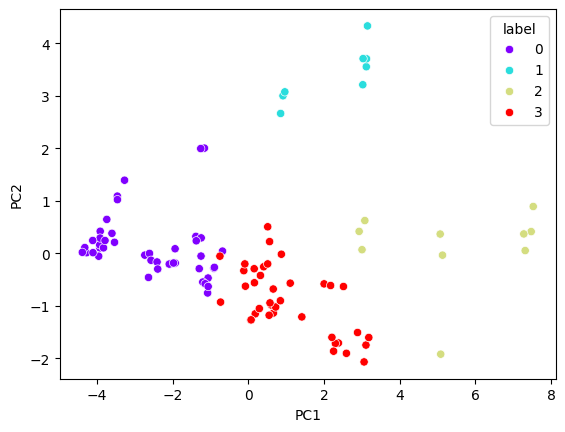

In [8]:
# scatter plot을 이용하여 2차원으로 차원 축소된 데이터를 시각화

sns.scatterplot(x='PC1',y='PC2', data = customer_pca, hue = 'label', palette='rainbow')

In [9]:
# components_ 속성을 사용하여 각 주성분과 기존 변수와의 상관관계 파악

pca.components_

array([[ 0.3484681 ,  0.32447242,  0.30303652,  0.14186907,  0.30618347,
         0.31297263,  0.29718852,  0.3045823 ,  0.29341337,  0.30287672,
         0.32053447,  0.08927503],
       [ 0.05827591,  0.06034266,  0.15264674, -0.54435586,  0.03109502,
         0.03790586,  0.23809571, -0.2315275 , -0.2471928 , -0.20898284,
         0.14479001,  0.65946781]])

In [10]:
# 넘파이 형태 출력 데이터를 데이터프레임으로 변환

df_comp = pd.DataFrame(pca.components_,columns=customer_X.columns)

<Axes: >

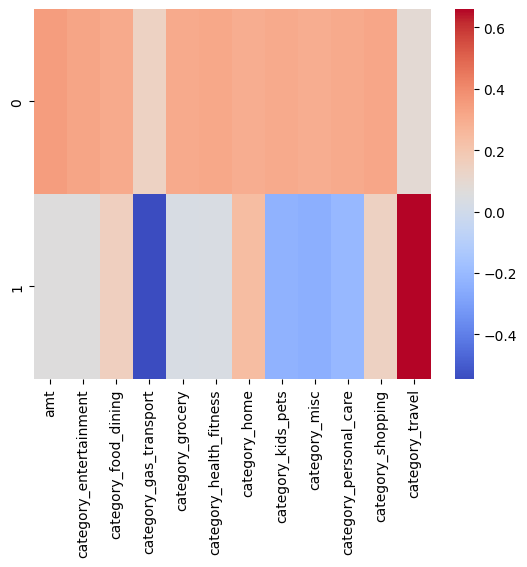

In [12]:
sns.heatmap(df_comp,cmap='coolwarm')

### 해설

- 왼쪽의 인덱스 0과 1은 각각 주성분 PC1 과 PC2 를 의미함

- 숫자들이 의미하는 바는 특정 주성분과 특정 변수와의 상관관계를 나타냄


----------------------------------

## PCA(주성분분석) 실습 2: 다차원 데이터 다루기

### (차원 축소 전후의 모델 학습 속도 및 예측 결과 비교)

#### 변수 이름들이 익명처리된 독립변수가 1천개가 넘는 데이터셋

In [39]:
# 데이터셋 불러오기

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/anonymous.csv'
anonymous = pd.read_csv(file_url)

In [40]:
anonymous.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 4297 entries, class to V4296
dtypes: float64(4283), int64(14)
memory usage: 655.7 MB


In [17]:
# "class"의 평균
anonymous['class'].mean()

0.25

In [22]:
# 데이터의 전체 결측치
anonymous.isna().sum().sum()

0

## PCA에 따른 모델링 성능/결과 비교하기


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(anonymous.drop('class', axis=1), anonymous['class'], test_size=0.2, random_state=100)

In [24]:
# 스케일링을 통해 데이터의 스케일을 맞추어 주어야 함
# StandardScaler 를 사용하여 각 변수의 평균이 0, 분산이 1이 되도록 스케일링

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# 랜덤포레스트를 통한 분류
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier(random_state=100)

In [27]:
# 학습에 소요되는 시간 측정
start_time = time.time()  # 시작시간 설정: 현재시간을 start_time 에 저장

model_1.fit(X_train_scaled, y_train)

print(time.time() - start_time)  # 현재시간 - 시작시간 = 학습에 소요된 시간

124.20969843864441


In [28]:
# 학습된 모델의 정확도 계산
from sklearn.metrics import accuracy_score

pred_1 = model_1.predict(X_test_scaled)
accuracy_score(y_test, pred_1)

0.958

In [29]:
# PCA를 통한 차원 축소 --> 2차원으로의 축소 (기존 4천개가 넘는 변수들을 2차원으로 축소 시도?)

pca = PCA(n_components=2)
pca.fit(X_train_scaled)

PCA(n_components=2)

In [30]:
# 각 주성분이 기존 변수의 분산을 얼마만큼 대변해주고 있는지를 확인

pca.explained_variance_ratio_

# 첫 번째 주성분은 0.049, 두 번째 주성분은 0.033 으로 둘을 합쳐봐야 기존 데이터의 0.08 정도의 정보만을 반영한다는 의미
# 따라서 2차원으로 축소한 데이터는 기존 데이터의 8% 정도의 정보만을 담고 있음 (정보 손실이 큼)

array([0.04992445, 0.03331409])

In [31]:
# 다양한 숫자의 주성분을 사용하여 정보 손실을 최소화하는 주성분의 개수를 찾아보기
# 임의로 주성분 개수를 100개부터 500개까지 50개씩 증가시키면서 정보 손실을 계산

var_ratio = []

for i in range(100, 550, 50):

    pca = PCA(n_components=i)
    pca.fit_transform(X_train_scaled)
    ratio = pca.explained_variance_ratio_.sum()
    var_ratio.append(ratio)

<Axes: >

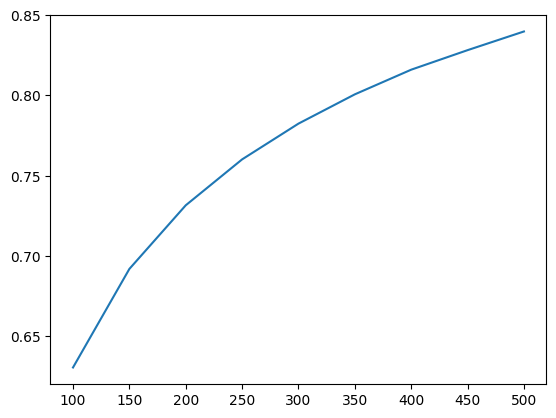

In [32]:
sns.lineplot(x=range(100,550,50), y=var_ratio)

# 주성분 수를 100에서 500까지 50씩 증가시키면서 정보 손실을 계산한 결과, 이 범위에서 얻을 수 있는 데이터 반영 비율은 약 60~83% 정도임

In [33]:
# 임의로 400개의 주성분을 사용하여 PCA를 수행 (80% 데이터 반영비율 임의 선택)

pca = PCA(n_components=400, random_state = 100)

pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [34]:
# 랜덤포레스트 모델 및 학습 시간 측정
model_2 = RandomForestClassifier(random_state=100)

start_time = time.time()
model_2.fit(X_train_scaled_pca, y_train)
print(time.time() - start_time)

79.36058521270752


In [35]:
# 학습된 모델의 정확도 계산

pred_2 = model_2.predict(X_test_scaled_pca)
accuracy_score(y_test, pred_2)

0.98925

정리)

### PCA 이전

    - 소요시간: 148초 (2m 28s)

    - 정확도: 0.958

### PCA 이후

    - 소요시간: 99초 (1m 39s)
    
    - 정확도: 0.989
            